### Introduction

The car hire industry is rapidly evolving, with increasing emphasis on fuel-efficient and environmentally friendly vehicles. Fuel consumption and CO₂ emissions are critical considerations when selecting vehicles for a fleet, as they directly impact operating costs and sustainability goals. This project examines these factors using a structured, data-driven approach. We will use a dataset from https://www.kaggle.com/  based on original data from https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64 . Using this data set we will: 
- Investigate car industry insights on fuel consumption, emissions, fuel types, engine sizes, and transmission types.
- Analyze the dataset to identify the makes with optimal fuel efficiency and low emissions.
- Perform statistical tests to understand how vehicle characteristics like fuel type and engine size influence fuel consumption and emissions.
- Provide actionable recommendations for the company to build an efficient, low-emission fleet.

### Problem Statement

Our Data Science Consulting Firm has been hired by Canadian start-up firm, that is venturing into the budget car rental business. Their mission is to provide a low-priced car rental model to cater for a demographic that is price and environmental conscious. They have tasked us to analyze different car makes, models for different vehicle classes to determine the most fuel effective models with the least carbon emmisions. Because car models are ever changing, they would want to understand the factors that drive those 2 variables and would like us to advise them on the critical characteristics that determine fuel usage and CO2 emissions that they can use to evaluate future car moels that enter the market. Our goal is to recommend an optimal **fleet mix** that maximizes client cost savings while promoting environmental responsibility.

### Objectives

Our analysis will consist of 5 main tasks:-
### 1. Industry Background
- **Goal:** Establish foundational knowledge on car industry factors affecting fuel consumption and emissions.
- **Method:** To do this we will research fuel type, engine size, and transmission type impacts on emissions and efficiency by 
refering to resources like the Green Vehicle Guide and European Commission standards.


### 2. Understanding the dataset
- **Goal:** Gain a thorough understanding of the dataset’s structure, terminology, and quality.
- **Tasks**
   - Understand the acronyms/technical terms used in the data set.
   - Review the shape and type of the data, understand the numerical and categorical columns. 
   - Handle missing values (drop or replace). 
   - Identify and remove duplicates. 
   - drop unnecessary columns and add new ones as needed<p>
### 3. Business Objectives
- **Goal:**
    - Help the car hire client select fuel-efficient, low emissions vehicles for their fleet. <p>
- **Specific Objectives:**  
    - **Top Makes by Class**: Identify 3 car makes for each vehicle class with the best fuel efficiency and lowest emissions.
    - **Key Influencing Factors:** Identify  the factors that determine fuel efficiency and low emissions.   
        a. Assess fuel efficiency and emissions by make.  
        b. Fuel efficiency and Emissions: Determine if these two variables are correlated.   
        c. Engine Size Impact: Investigate correlation with fuel consumption and emissions.    
        d. Transmission Type Influence: Determine if certain transmission types improve fuel efficiency.   
        e. Fuel Type Effect: Analyze how fuel type impacts emissions. <p> 
       
### 4. Statistical Tests
- **Trend Analysis**  
       a. Trend analysis to identify average fuel consumption for all vehicles over time  
       b. Trend analysis to identify average emissions for all vehicles over time<p>
    
     
- **Regression Analysis**  
       a. Effect of engine size on fuel efficiency  
       b. Effect of fuel consumption as measured by 'Comb (L/100 KM) on emissions  
       c. Effect of Transmission type on fuel efficiency  
       d. Effect of fuel type on emissions  <p>
    
          
- **Hypothesis Testing**   
       a. Test whether the relationships obtained by our regression models above are statistically significant<p>  
       
       
### 5. Summary and Recommendations 
- **Goal:** Synthesize findings and offer actionable recommendations.
- **Outcomes:**
    - Fleet Composition Advice: Recommend vehicle makes that balance fuel economy and emissions.
    - Impact Summary: Highlight significant factors affecting fuel efficiency and emissions.

           
           
           
           
           
           
           
           

### 1.0 Industry Background

 From the Data Card in the Kaggle dataset, we have obtained the following explanations about the abbreviations used:

**Model**

4WD/4X4 = Four-wheel drive;
AWD = All-wheel drive;
CNG = Compressed natural gas;
FFV = Flexible-fuel vehicle;
NGV = Natural gas vehicle

**Transmission**

A = Automatic; 
AM = Automated manual; 
AS = Automatic with select shift; 
AV = Continuously variable; 
M = Manual; 
3 - 10 = Number of gears

**Fuel Type**

X = Regular gasoline:
Z = Premium gasoline:
D = Diesel:
E = Ethanol (E85);
N = Natural Gas

**Fuel Consumption**:
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

The car industry standards for fuel efficiency are often measured in liters per 100 kilometers (L/100 km) combined rating. Here's a general classification of fuel efficiency categories:

**Low Fuel Efficiency**: Vehicles that consume more than 12 L/100 km.

**Medium Fuel Efficiency**: Vehicles that consume between 8 L/100 km and 12 L/100 km.

**High Fuel Efficiency** : Vehicles that consume less than 8 L/100 km.

**CO2 Emissions**:
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

**Low Emissions**: Typically, vehicles with emissions below 150 g CO₂/km are considered low-emission.

**Medium Emissions**: Vehicles with emissions above 150 g CO₂/km and below 250 g CO₂/km fall into the medium-emission category.

**High Emissions**: Vehicles with emissions above 250 g CO₂/km are considered high-emission.

These standards are designed to reduce greenhouse gas emissions and improve air quality, contributing to global efforts to combat climate change. Here are some targets for fuel emissions and fuel efficiency for the USA, Canada and the EU by 2030:

**USA**

**Emissions Reduction**: The USA aims to reduce greenhouse gas emissions by 50-52% below 2005 levels by 2030.
**Fuel Efficiency**: The USA has set ambitious fuel efficiency standards for vehicles, aiming to increase the average fuel economy to about 50 miles per gallon by 2025, with further improvements expected by 2030.

**Canada**

**Emissions Reduction**: Canada has committed to reducing greenhouse gas emissions by 40-45% below 2005 levels by 2030.
**Fuel Efficiency**: Canada is focusing on improving fuel efficiency through measures like carbon pricing, clean fuels, and promoting electric vehicles.

**EU**

**Emissions Reduction**: The EU aims to reduce greenhouse gas emissions by 55% below 1990 levels by 2030.
**Fuel Efficiency**: The EU has set an ambitious energy efficiency target of reducing final energy consumption by 11.7% compared to projections for 2030

### 2. 1  Understanding the Dataset

In [4]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()
%matplotlib inline

In [5]:
# Load the data as a dataframe and dsplay the first 5 rows
data = pd.read_csv('Fuel_Consumption_2000_2022.csv')
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [6]:
# check the shape of the data
data.shape
print(f"This data set consists of {data.shape[0]} rows")
print(f"This data set consists of {data.shape[1]} columns")

This data set consists of 22556 rows
This data set consists of 13 columns


In [7]:
data.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [8]:
# Get column attributes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


From the column attributes the data does not have any null values. Also the columns that we expect to be numerical are well formatted as int or float. Categorical columns are likewise well formatted as objects. 

In [9]:
# confirming there are no Null values
data.isnull().values.any()

np.False_

In [10]:
# Get statistical summary of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


From these summary statistics, we can detect detect extreme values in the 100th percentile, for all variables. The values are all more than twice as large as the numbers we are seeing in the 75th percentile. This is indicative of a outliers in the data set. This is not peculiar in the car industry as we have vehicles that are manufuctured for high performance e.g. for sporting activities or luxury (niche market)  and their features are significantly different from what are found in cars that are for regular use.

In [11]:
# Get statistical summary of the categorical columns
data.describe(include='O').T


,count,unique,top,freq
MAKE,22556,87,CHEVROLET,1725
MODEL,22556,4242,JETTA,89
VEHICLE CLASS,22556,32,SUV,2640
TRANSMISSION,22556,30,A4,3519
FUEL,22556,5,X,11822


We observe that most popular make is Chevrolet and Jetta is the most prevalent model. The SUV is the most popular class of vehicle and most transmissions are 4 gear automatic. Regular gasoline cars are the most common.

## 2.2 Data Cleaning and Feature Engineering

Now that we have understood the basic data structure and the data types, we can go ahead and clean the data set before we can perform Explorative Data Analysis. In this section, we will clean up column names and also certain values in the data, drop any irrelevant columns, check for duplicates and outliers and drop duplicates and any extreme values that may distort our statistical analysis.

In [12]:
# Making a copy of the DataFrame before we clean
data1 = data.copy(deep=True)
data1.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [13]:
# check for duplicates
data1[data1.duplicated()]

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
378,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,17.7,12.7,15.4,18,354


In [14]:
# drop the duplicate row
data1.drop_duplicates(inplace=True)

In [15]:
# confirm the row is dropped
#data.shape
print(f"This data set consists of {data1.shape[0]} rows")
print(f"This data set consists of {data1.shape[1]} columns")

This data set consists of 22555 rows
This data set consists of 13 columns


We now have one less row on the dataset

In [16]:
# Change column names to sentence case for better readability

data1.columns = data.columns.str.title()
data1.head(1)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186


In [17]:
# View unique values in Make,Vehicle Class and Transmission to check for duplicated entries due to spellings/case sensitivity 

columns_to_check = ['Make','Vehicle Class','Transmission']

# check for unique values in the specified column
unique_values = data1[columns_to_check].apply(lambda x: x.unique())

#Display the unique values for each specified column
for column in unique_values.index:
    print(f"Unique values in '{column}':{unique_values[column]}")

Unique values in 'Make':['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS' 'Acura' 'Alfa Romeo' 'Aston Martin' 'Audi'
 'Bentley' 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Genesis' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce'
 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']
Unique values in 'Vehicle Class':['COMPACT' 'MID-SIZE' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'TWO-

We have duplicated names in the Make and Vehicle columns. Upper Case names are duplicates of the sentence case names. The transmission column consists of 2 elements: Transmission type and the number of gears. For enhanced analysis, we will split these into two new columns.

In [18]:
# Convert the 'Make ' column to Sentence case
data1['Make'] = data1['Make'].str.title()

# Check unique values again
data1['Make'].unique()

array(['Acura', 'Audi', 'Bmw', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Daewoo', 'Dodge', 'Ferrari', 'Ford', 'Gmc', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Land Rover', 'Lexus', 'Lincoln', 'Mazda', 'Mercedes-Benz',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo',
       'Bentley', 'Rolls-Royce', 'Maserati', 'Mini', 'Mitsubishi',
       'Smart', 'Hummer', 'Aston Martin', 'Lamborghini', 'Bugatti',
       'Scion', 'Fiat', 'Ram', 'Srt', 'Alfa Romeo', 'Genesis'],
      dtype=object)

In [19]:
# Define the mapping to replace the Upper Case duplicates for the Vehicle Class column. 
# We will use mapping because the duplicate value have both case sensitivity and "-" and ":" separation issues

replace_dict = { 'COMPACT': 'Compact', 'MID-SIZE': 'Mid-size', 'SUBCOMPACT': 'Subcompact', 
                'STATION WAGON - MID-SIZE': 'Station wagon: Mid-size','MINICOMPACT': 'Minicompact',
                'TWO-SEATER': 'Two-seater','STATION WAGON - SMALL': 'Station wagon: Small',
                'FULL-SIZE': 'Full-size', 'SUV': 'SUV: Standard','VAN - CARGO':'Van:Cargo',
                'VAN - PASSENGER':'Van: Passenger','PICKUP TRUCK - STANDARD':'Pickup truck: Standard',
                'PICKUP TRUCK - SMALL':'Pickup truck: Small','MINIVAN': 'Minivan','SUV - STANDARD': 'SUV: Standard',
                'SPECIAL PURPOSE VEHICLE': 'Special purpose vehicle','SUV - SMALL': 'SUV: Small'}

# Replace the upper case duplicates 
data1['Vehicle Class'] = data1['Vehicle Class'].replace(replace_dict)
data1['Vehicle Class'].unique()
               

array(['Compact', 'Mid-size', 'Subcompact', 'Station wagon: Mid-size',
       'Minicompact', 'Two-seater', 'Station wagon: Small', 'Full-size',
       'SUV: Standard', 'Van:Cargo', 'Van: Passenger',
       'Pickup truck: Standard', 'Pickup truck: Small', 'Minivan',
       'Special purpose vehicle', 'SUV: Small'], dtype=object)

In [20]:
# Create 2 new columns for 'Transmission Type' and 'Gears' from the transmission column

data1['Transmission Type'] = data1['Transmission'].str.extract(r'([A-Za-z]+)') 
data1['Gears'] = data1['Transmission'].str.extract(r'(\d+)') 
# Convert Gears column to numeric type 
data1['Gears'] = pd.to_numeric(data1['Gears'], errors='coerce') 
# Display the updated DataFrame 
data1.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0


In [21]:
# Classify emissions column into low, medium and high based on industry standards:

# Define a function to classify emissions 

def classify_emissions(x): 
    if x <= 150: 
        return 'Low' 
    elif 100 < x <= 250: 
        return 'Medium' 
    else: 
        return 'High'
    
#Apply the classification function to the emissions column

data1['Emissions Class'] = data1['Emissions'].apply(classify_emissions)
data1.head(5)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears,Emissions Class
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0,Medium
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0,Medium
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0,Medium
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0,High
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0,Medium


In [22]:
# Classify Fuel Consumption into low, medium and high efficiency based on general industry standards. We will use the 
# 'Comb (L/100 Km)' column which is the average experince of a regular car rental customer

#Define a function to classify fuel efficiency 

def fuel_efficiency(y): 
    if y > 12: 
        return 'Low Efficiency' 
    elif 8 <= y <= 12: 
        return 'Medium Efficiency' 
    else: 
        return 'High Efficiency'
    
#Apply the classification function to the emissions column

data1['Fuel Efficiency'] = data1['Comb (L/100 Km)'].apply(fuel_efficiency)
data1.head(5)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,1.6EL,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,1.6EL,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175,M,5.0,Medium,High Efficiency
2,2000,Acura,3.2TL,Mid-size,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,3.5RL,Mid-size,3.5,6,A4,Z,13.4,9.2,11.5,25,264,A,4.0,High,Medium Efficiency
4,2000,Acura,INTEGRA,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198,A,4.0,Medium,Medium Efficiency


In [23]:
# Numerical columns statistics
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,22555.0,2011.554955,6.297939,2000.0,2006.0,2012.0,2017.0,2022.0
Engine Size,22555.0,3.356617,1.335448,0.8,2.3,3.0,4.2,8.4
Cylinders,22555.0,5.854046,1.819582,2.0,4.0,6.0,8.0,16.0
Fuel Consumption,22555.0,12.763294,3.500922,3.5,10.4,12.3,14.7,30.6
Hwy (L/100 Km),22555.0,8.918958,2.274675,3.2,7.3,8.4,10.2,20.9
Comb (L/100 Km),22555.0,11.034148,2.910839,3.6,9.1,10.6,12.7,26.1
Comb (Mpg),22555.0,27.374950,7.376881,11.0,22.0,27.0,31.0,78.0
Emissions,22555.0,250.063844,59.352558,83.0,209.0,243.0,288.0,608.0
Gears,21739.0,5.971342,1.469272,1.0,5.0,6.0,7.0,10.0


The max column shows that we have significant outliers in most columns which is expected in the industry due to specific luxury and sports performance niches. These outliers adversely affect fuel efficiency and emissions and we should remove them for better analysis of the data.

In [24]:
# Categorical Columns Analysis
data1.describe(include='O').T


,count,unique,top,freq
Make,22555,52,Chevrolet,2130
Model,22555,4242,JETTA,89
Vehicle Class,22555,16,SUV: Standard,3761
Transmission,22555,30,A4,3518
Fuel,22555,5,X,11822
Transmission Type,22555,5,A,8690
Emissions Class,22555,3,Medium,11742
Fuel Efficiency,22555,3,Medium Efficiency,12999


It is interesting to note that most vehicles are in the medium emissions class range and the medium fuel efficiency range. This is expected because technologies for high fuel efficiency that lead to low emissions are still not fully adopted. However major countries in the world have set targets to continously improve on the 2 variables systematically.

In [25]:
# Drop the 'Comb (Mpg)'(imperial standard used mostly in the US) column ; all other relevant are using the metric system
# Drop the 'Transmission' column as it has been split into 2 new columns: 'Transmission Type' and 'Gears'
# Drop the Model names as they arenot useful for this analysis as they are too many
# Drop Fuel Consumption (listed by manufucturer) as we will use the combined rating (55% city, 45% hwy)for our analysis 
data2 = data1.drop(columns=['Comb (Mpg)','Transmission','Model','Fuel Consumption'])
data2

,Year,Make,Vehicle Class,Engine Size,Cylinders,Fuel,Hwy (L/100 Km),Comb (L/100 Km),Emissions,Transmission Type,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,Compact,1.6,4,X,6.7,8.1,186,A,4.0,Medium,Medium Efficiency
1,2000,Acura,Compact,1.6,4,X,6.5,7.6,175,M,5.0,Medium,High Efficiency
2,2000,Acura,Mid-size,3.2,6,Z,7.4,10.0,230,AS,5.0,Medium,Medium Efficiency
3,2000,Acura,Mid-size,3.5,6,Z,9.2,11.5,264,A,4.0,High,Medium Efficiency
4,2000,Acura,Subcompact,1.8,4,X,7.0,8.6,198,A,4.0,Medium,Medium Efficiency
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,SUV: Small,2.0,4,Z,7.7,9.4,219,AS,8.0,Medium,Medium Efficiency
22552,2022,Volvo,SUV: Small,2.0,4,Z,8.1,9.4,219,AS,8.0,Medium,Medium Efficiency
22553,2022,Volvo,SUV: Small,2.0,4,Z,8.7,9.9,232,AS,8.0,Medium,Medium Efficiency
22554,2022,Volvo,SUV: Standard,2.0,4,Z,8.4,10.1,236,AS,8.0,Medium,Medium Efficiency


In [26]:
# Remove for outliers in various columns using IQR method

def remove_outliers(df,columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column]<=upper_bound)]
    return df

# columns to check for outliers
check_outliers = ['Engine Size','Cylinders','Hwy (L/100 Km)',
                    'Comb (L/100 Km)','Emissions','Gears']
# Remove outliers
data3 = remove_outliers(data2,check_outliers)


In [27]:
# check the shape of the data after removing outliers
data3.shape
print(f"This data set consists of {data3.shape[0]} rows")
print(f"This data set consists of {data3.shape[1]} columns")

This data set consists of 20974 rows
This data set consists of 13 columns


Removing outliers has reduced the records from 22555 rows to 20974 rows

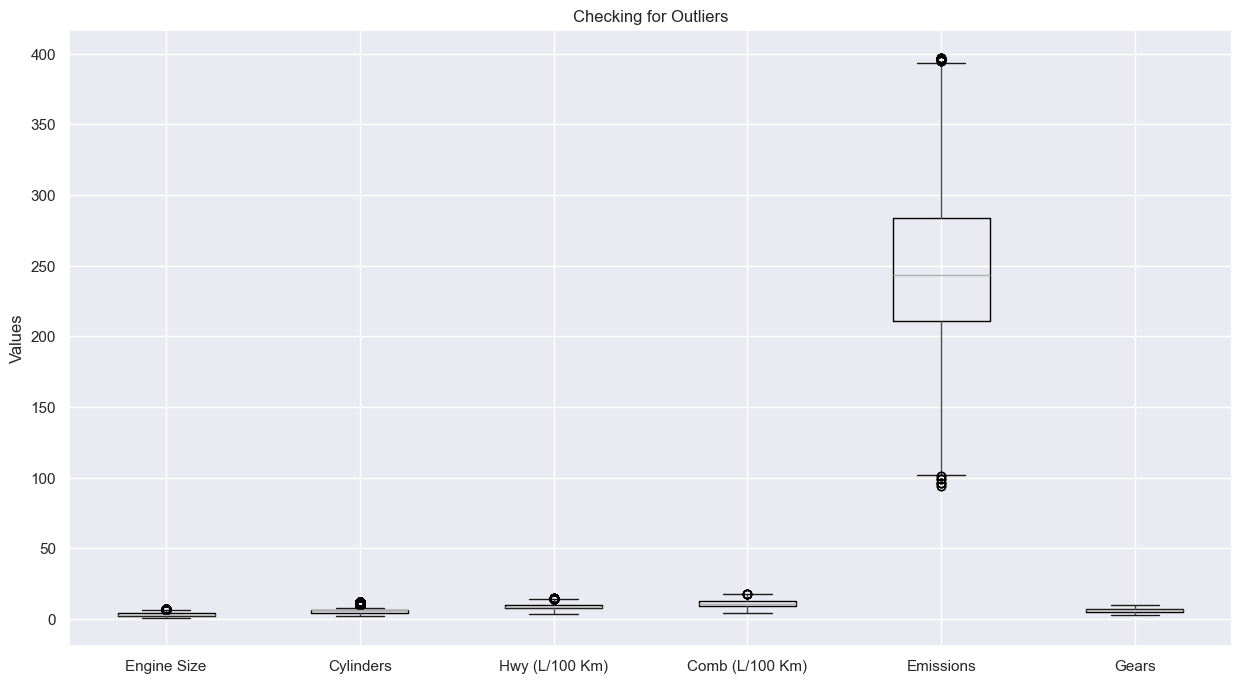

In [28]:
# Generate boxplots for cleaned columns to confirm outliers have been dropped
plt.figure(figsize=(15,8))
data3.boxplot(column=['Engine Size','Cylinders','Hwy (L/100 Km)',
                    'Comb (L/100 Km)','Emissions','Gears'], boxprops=dict(linewidth=1 ))
plt.title('Checking for Outliers')
plt.ylabel('Values')

                          
plt.show();

The outliers are now eliminated and we can go ahead and start EDA. But first we save the clean dataframe to a CSV and make a copy of the same

In [29]:
# Rename variables in the 'Fuel' column
data3['Fuel'] = data3['Fuel'].replace({
    'X': 'Regular',
    'Z': 'Premium',
    'E': 'Ethanol',
    'N': 'Natural Gas',
    'D': 'Diesel'
})


In [30]:
# Rename variables in the 'Transmission Type' column
data3['Transmission Type'] = data3['Transmission Type'].replace({
    'A':'Auto',
    'AS':'Auto Shift',
    'M':'Manual',
    'AM':'Auto Manual',
    'AV':'Auto Variable'
})


In [31]:
# Rename the columns 
data3.rename(columns={'Transmission Type': 'Transmission'}, inplace=True)
data3.rename(columns={'Comb (L/100 Km)': 'Comb_L_per_100Km'}, inplace=True)
data3.rename(columns={'Hwy (L/100 Km)': 'Hwy_L_per_100Km'}, inplace=True)

In [32]:
# display to view changes
data3.head()

,Year,Make,Vehicle Class,Engine Size,Cylinders,Fuel,Hwy_L_per_100Km,Comb_L_per_100Km,Emissions,Transmission,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,Compact,1.6,4,Regular,6.7,8.1,186,Auto,4.0,Medium,Medium Efficiency
1,2000,Acura,Compact,1.6,4,Regular,6.5,7.6,175,Manual,5.0,Medium,High Efficiency
2,2000,Acura,Mid-size,3.2,6,Premium,7.4,10.0,230,Auto Shift,5.0,Medium,Medium Efficiency
3,2000,Acura,Mid-size,3.5,6,Premium,9.2,11.5,264,Auto,4.0,High,Medium Efficiency
4,2000,Acura,Subcompact,1.8,4,Regular,7.0,8.6,198,Auto,4.0,Medium,Medium Efficiency


In [33]:
# save the clean dataframe in csv format
data3.to_csv('FuelEfficiency_Clean.csv',index=False)

In [34]:
# create a copy of the clean dataframe
data3=data3.copy(deep=True)

## 3. Exploratory Data Analysis (EDA)

We will perform univariate, bivariate and multivariate data analysis using summary statistics and visualizations to determine the most fuel efficient vehicles in each vehicle class that also have the lowest carbon emissions. Since we are looking for a fleet that cuts across different vehicle classes to appeal to a wide range of customers, our analysis will determine the following:-

1. The best 3 makes based on the fuel efficieny and low emissions criteria for each vehicle class 
2. Check the trends of fuel efficiency and emissions over time.
3. Investigate the correlation of various vehicle attributes using covariance analysis
4. Using simple regression analysis (for numerical variables) and Anova (for categorical variables), investigate the relationship between various vehicle attributes such as fuel type, engine size, no. of cylinders, transmission type with fuel efficiency and low emmissions.
5. Using Hypothesis testing, test these relationships for statistical significance.


In [35]:
# Load the clean dataset and create a new dataframe
df_clean = pd.read_csv('FuelEfficiency_Clean.csv')
df_clean.head()

,Year,Make,Vehicle Class,Engine Size,Cylinders,Fuel,Hwy_L_per_100Km,Comb_L_per_100Km,Emissions,Transmission,Gears,Emissions Class,Fuel Efficiency
0,2000,Acura,Compact,1.6,4,Regular,6.7,8.1,186,Auto,4.0,Medium,Medium Efficiency
1,2000,Acura,Compact,1.6,4,Regular,6.5,7.6,175,Manual,5.0,Medium,High Efficiency
2,2000,Acura,Mid-size,3.2,6,Premium,7.4,10.0,230,Auto Shift,5.0,Medium,Medium Efficiency
3,2000,Acura,Mid-size,3.5,6,Premium,9.2,11.5,264,Auto,4.0,High,Medium Efficiency
4,2000,Acura,Subcompact,1.8,4,Regular,7.0,8.6,198,Auto,4.0,Medium,Medium Efficiency


In [36]:
df_clean.columns


Index(['Year', 'Make', 'Vehicle Class', 'Engine Size', 'Cylinders', 'Fuel',
       'Hwy_L_per_100Km', 'Comb_L_per_100Km', 'Emissions', 'Transmission',
       'Gears', 'Emissions Class', 'Fuel Efficiency'],
      dtype='object')

### 3.1 Univariate Analysis

The following analysis will help us understand the statistical characteristics, the distribution and frequencies of individual columns in our data set 

In [37]:
# Get Descriptive statistical summary of the numerical columns
# Define custom aggregation functions
specific_cols = ['Engine Size','Cylinders','Emissions','Gears','Hwy_L_per_100Km','Comb_L_per_100Km']
descriptive_stats = df_clean[specific_cols].agg(['mean','std','median','min','max']).T
Mode = df_clean[specific_cols].mode().iloc[0]

print(descriptive_stats)

print(f"Mode of the columns:\n{Mode}")


                        mean        std  median   min    max
Engine Size         3.313789   1.272172     3.0   0.8    7.0
Cylinders           5.807238   1.738160     6.0   2.0   12.0
Emissions         249.066082  53.940527   243.0  94.0  397.0
Gears               5.988986   1.464930     6.0   3.0   10.0
Hwy_L_per_100Km     8.781425   1.944904     8.4   3.8   14.5
Comb_L_per_100Km   10.883608   2.457808    10.6   4.0   17.7
Mode of the columns:
Engine Size           2.0
Cylinders             6.0
Emissions           221.0
Gears                 6.0
Hwy_L_per_100Km       7.8
Comb_L_per_100Km      9.8
Name: 0, dtype: float64


The data shows a high variance on emissions, moderate variance on consumption and low variance on consumption.

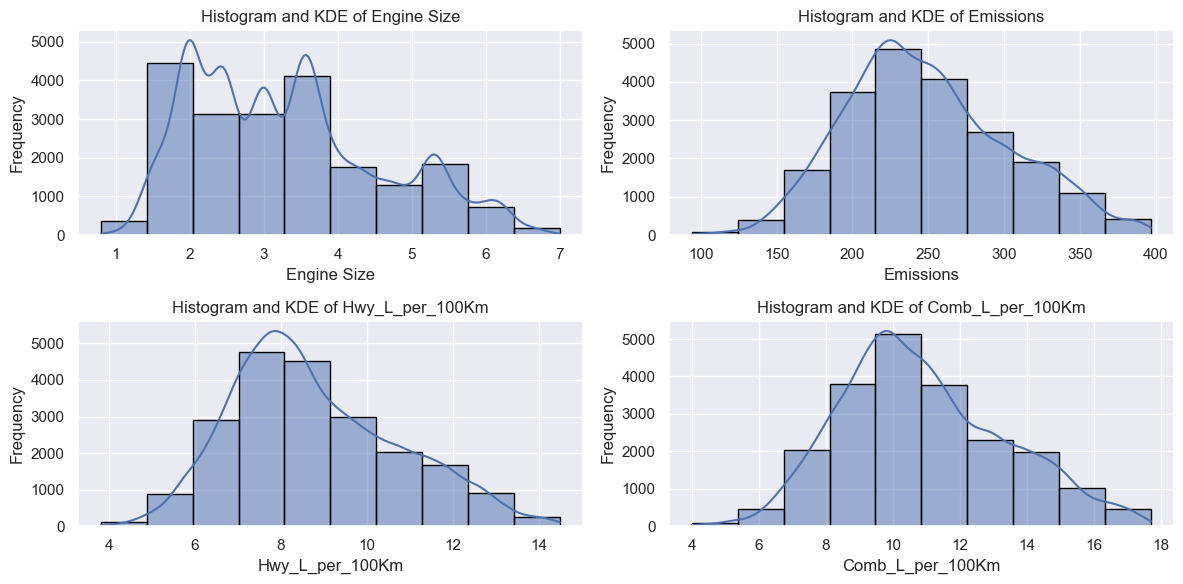

In [38]:

# Plot histograms for numerical coloumns
list_cols = ['Engine Size','Emissions','Hwy_L_per_100Km', 'Comb_L_per_100Km']

# Create sub-plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6)) 
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(list_cols): 
    sns.histplot(df_clean[column], bins=10,kde=True,ax=axes[i],edgecolor='black') 
    axes[i].set_title(f'Histogram and KDE of {column}') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Engine Size:** Most vehicles have engines between 2 and 4 liters, with fewer large-engine vehicles (above 6 liters), indicating a majority of standard vehicles.  
**Highway and Combined (L/100 Km):** Appears nearly normally distibuted with a right skew, indicating some high consumption cars. Most values are concentrated inthe 7 to 12 litres per 100 km range indicating medium fuel efficiency as per industry standards.  
**Emissions:** Emissions have a similar distribution as the highway and combined fuel consumption; this is an indication that emissions are highly correlated with fuel consumption. most values concentrated around 150–300 g/km, and some with some notable higher emissions values.  
**KDE Fit:** For emissions and fuel consumption, KDE lines closely match histogram bars, suggesting well-distributed data patterns without extreme outlier influence.


In [39]:
# Get statistical summary of the categorical columns
df_clean.describe(include='O').T

,count,unique,top,freq
Make,20974,50,Chevrolet,1915
Vehicle Class,20974,16,SUV: Standard,3422
Fuel,20974,5,Regular,11013
Transmission,20974,5,Auto,8162
Emissions Class,20974,3,Medium,11132
Fuel Efficiency,20974,3,Medium Efficiency,12645


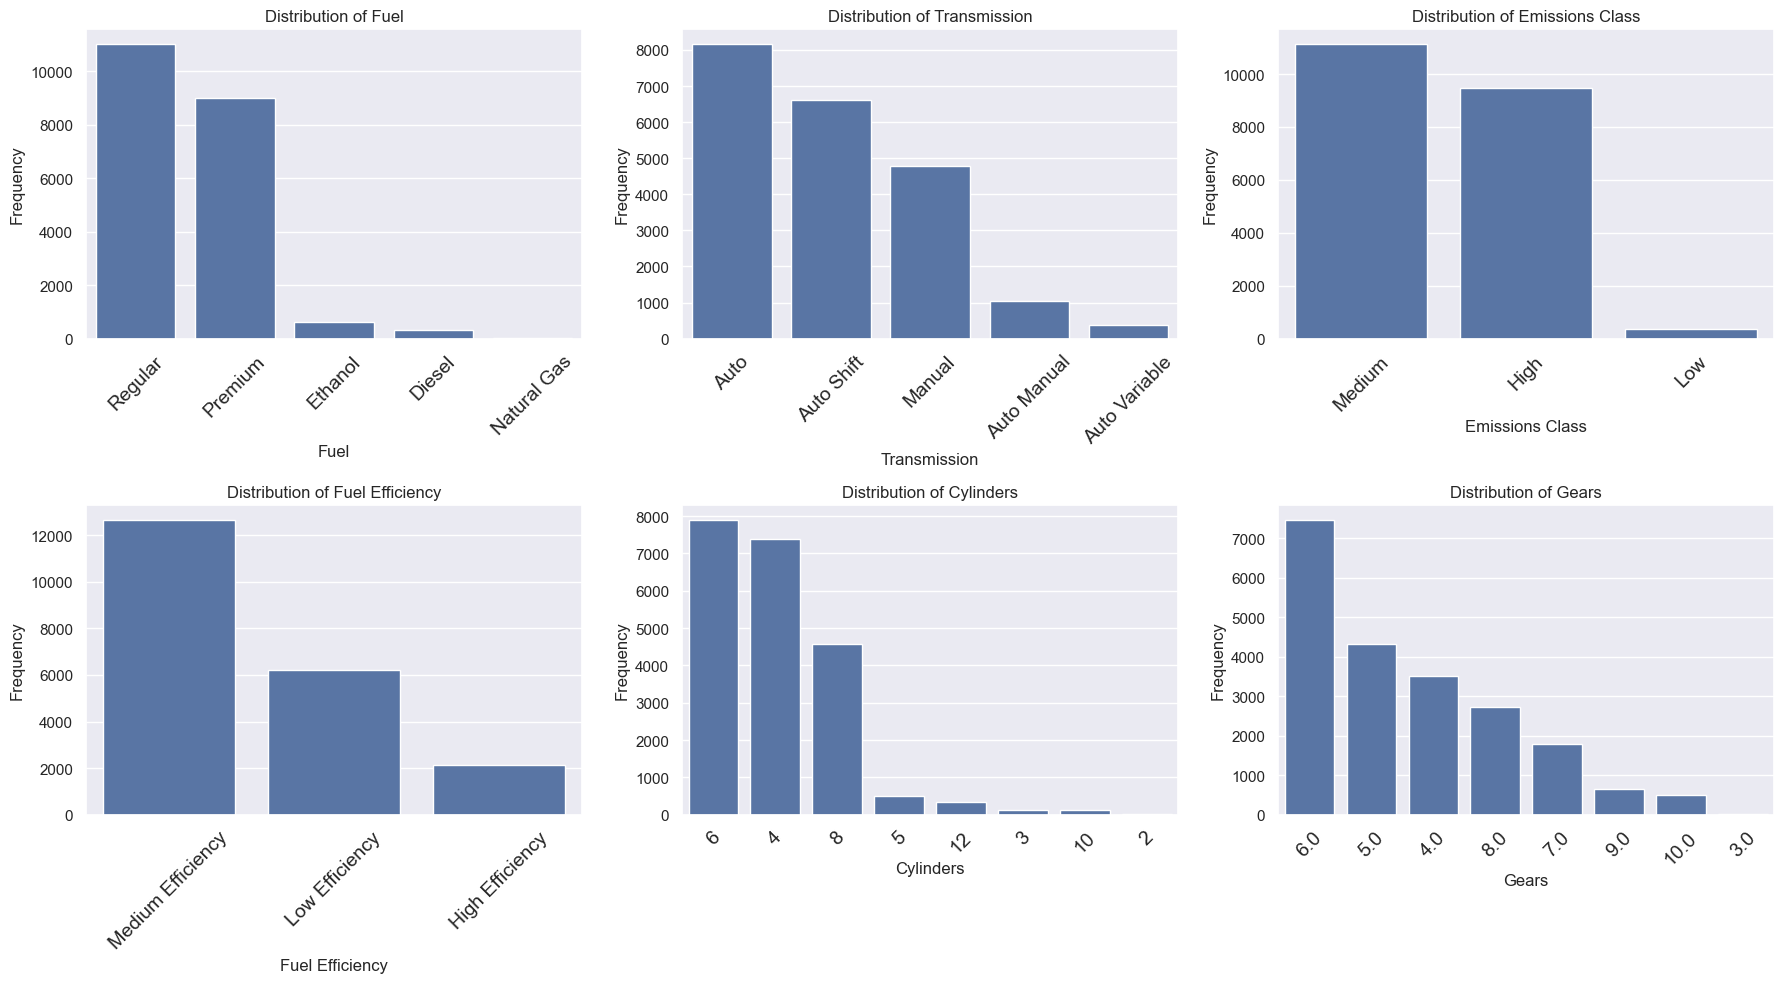

In [40]:
# plot frequency distributions 
def plot_frequency_dist(df_clean, columns,rows,cols): 
    fig,axes = plt.subplots(rows,cols,figsize=(18,10))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        sns.countplot(x=column, data=df_clean, order=df_clean[column].value_counts().index, ax=axes[i]) 
        axes[i].set_title(f"Distribution of {column}") 
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45,labelsize=14)
        
    plt.tight_layout()
    plt.show() 
        
        
# List of columns 
columns_list = ['Fuel','Transmission', 'Emissions Class','Fuel Efficiency',
                'Cylinders','Gears'] 

rows = 2
cols = 3
# Plot frequency distributions for categorical columns 
plot_frequency_dist(df_clean, columns_list,rows,cols)

**Fuel**: Most prevaleny fuel types by far are Regular and Premium gasoline.  
**Transmission**: Auto, Auto Shift and Manual are the most common types.  
**Emissions**: Clearly shows that we have a long way to go when it comes to the recommended standards for low emissions. Most cars have the medium emission standards, but a lot of vehicles are still in the high emissions category.   
**Fuel Efficiency**: Most vehicles are im the Medium Efficiency class that explains the emissions paterns observed.  
**Cylinders:** Distribution shows clear peaks at 4, 6, and 8 cylinders, which aligns with common engine configurations.  
**Gears:** Most vehicles have 4 to 6 gears also aligning to known transmission configurations

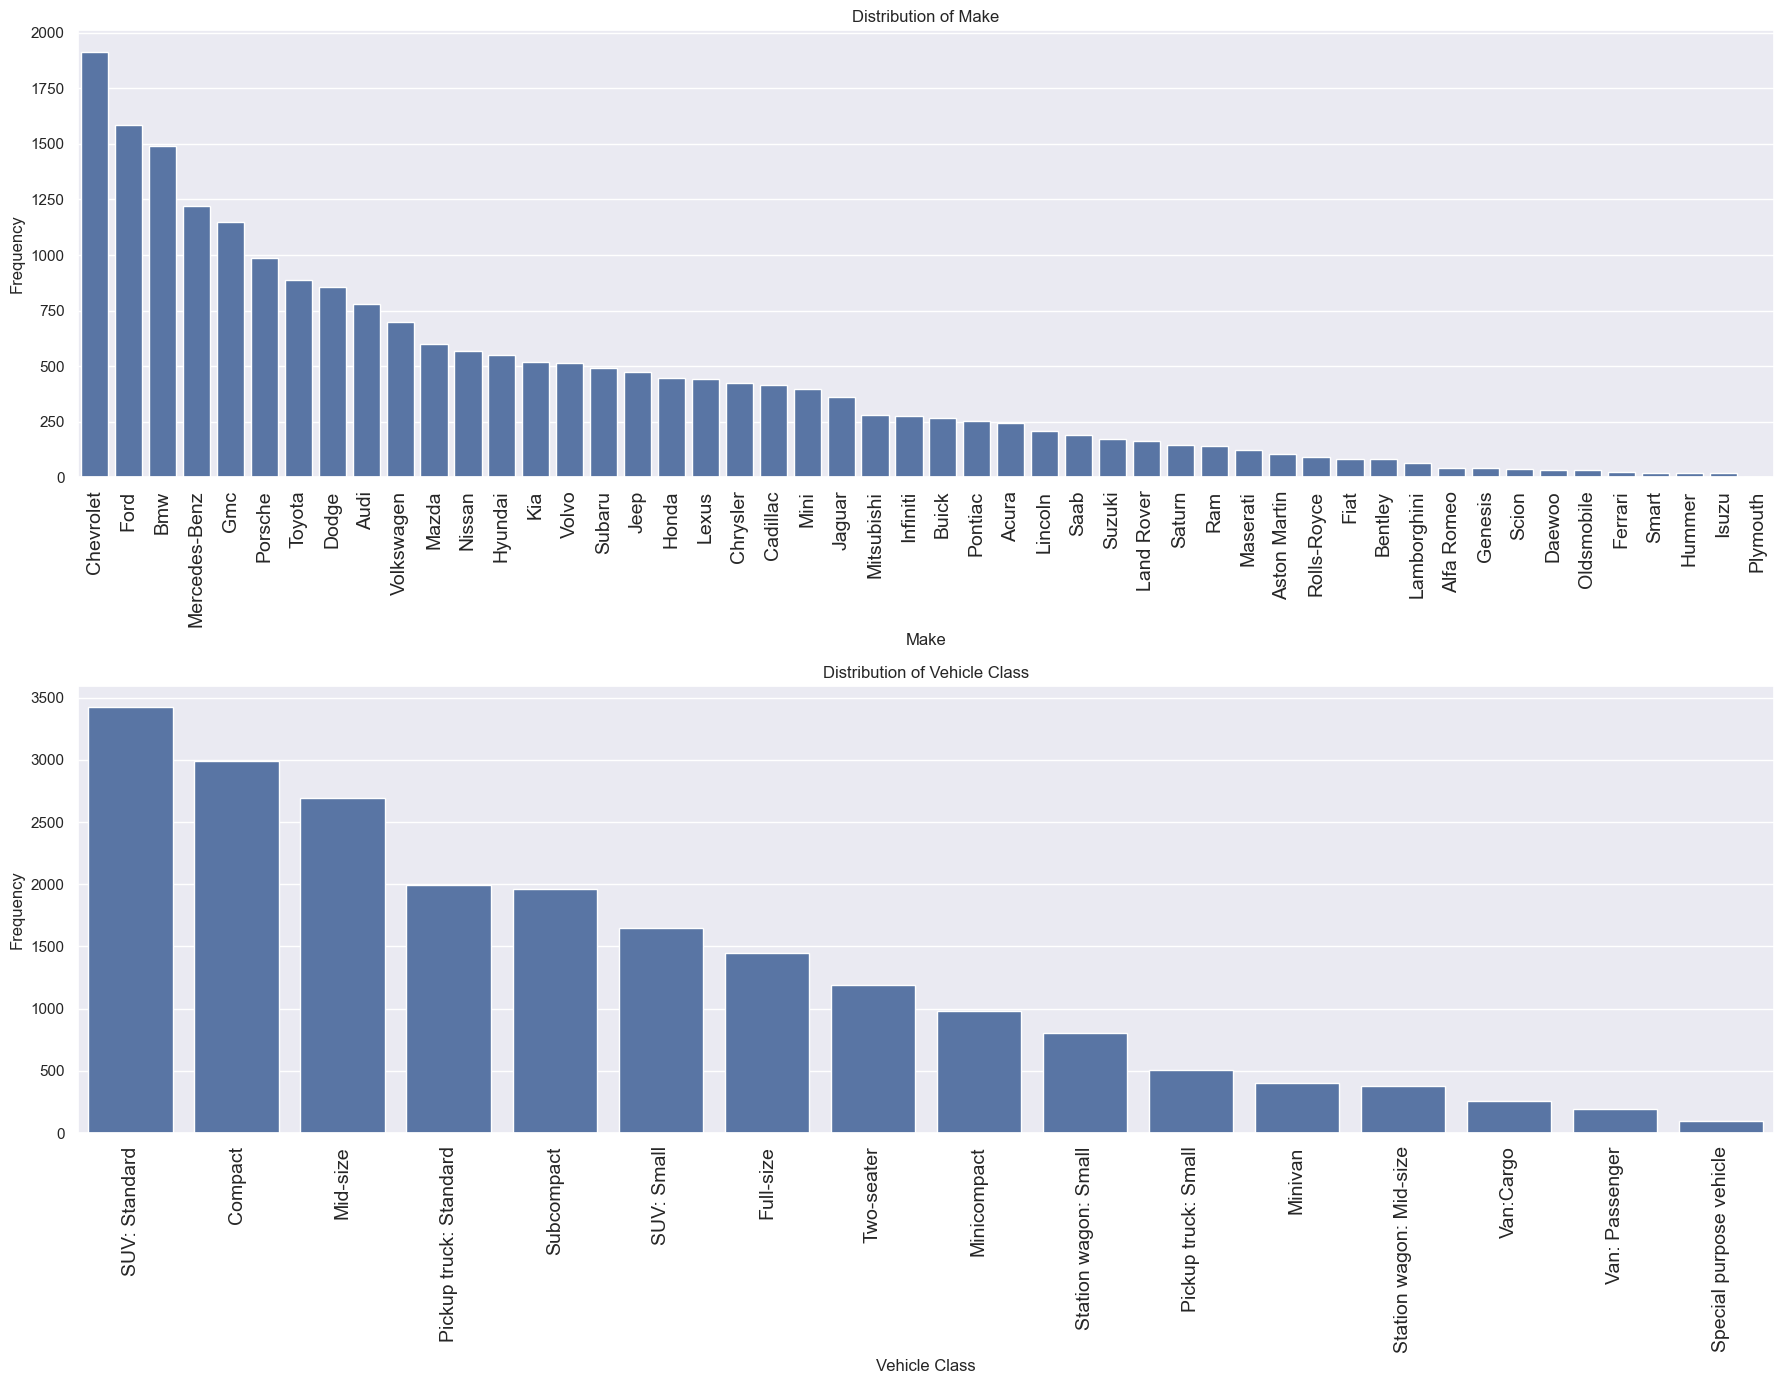

In [41]:
# plot frequency distributions for Make and Vehicle Class
def plot_frequency_dist(df_clean, columns,rows,cols): 
    fig,axes = plt.subplots(rows,cols,figsize=(18,14))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        sns.countplot(x=column, data=df_clean, order=df_clean[column].value_counts().index, ax=axes[i]) 
        axes[i].set_title(f"Distribution of {column}") 
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=90,labelsize=14)
        
    plt.tight_layout()
    plt.show() 
        
        
# List of columns 
columns_list = ['Make','Vehicle Class'] 

rows = 2
cols = 1
# Plot frequency distributions for categorical columns 
plot_frequency_dist(df_clean, columns_list,rows,cols)

### 3.2 Bivariate Analysis
In this section, we will examine the relationships between our two variables of interest (emissions and fuel efficiency) with other variables like make,vehicle class,fuel, gears,transmission type etc. This will help us determine the characteristics that contribute to better fuel efficiency and low emissions and help us narrow down to our proposed fleet composition. We will use correlation analysis (including heat maps) to quatify the strength and direction of the relationship variables, bar plots to visualize the relationship between two categorical variables, Box Plots to compare distributions of a numerical variable across different categories, scatter plots to investigate the relationship between two numerical variables (and also help us determinal linearity)  

#### 3.2.1 Correlation Analysis of the numerical columns

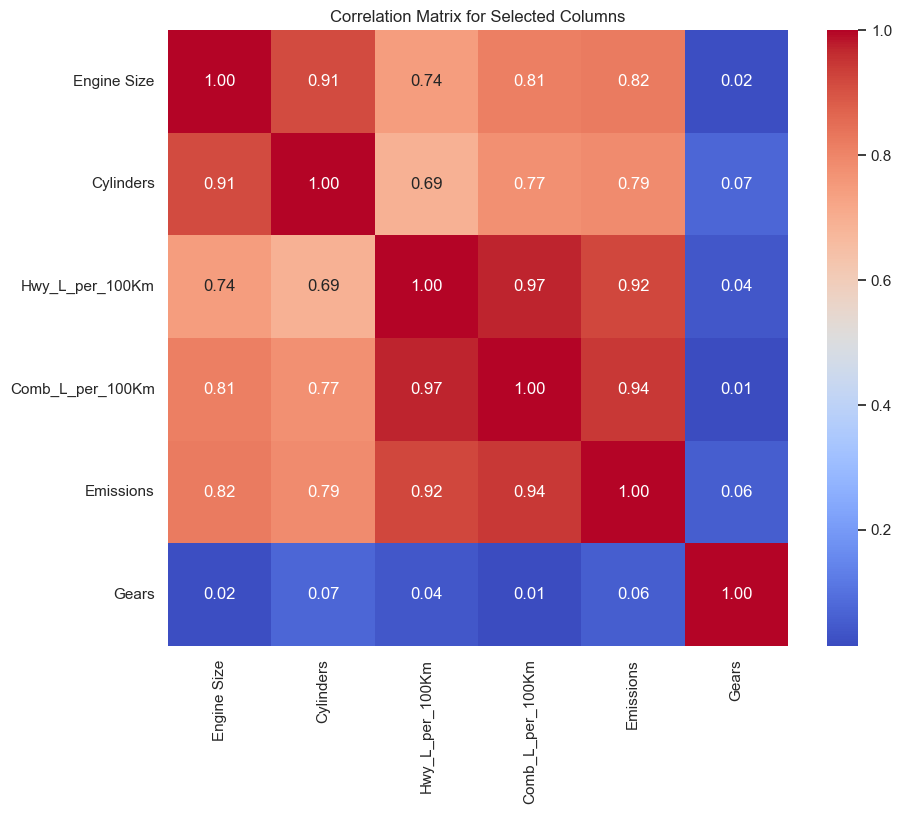

In [42]:
corr_matrix = df_clean[['Engine Size', 'Cylinders',
       'Hwy_L_per_100Km','Comb_L_per_100Km',
       'Emissions','Gears']].corr()

# Create a heatmap to visualize the correlation matrix 
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Columns') 
plt.show()

**Observations**
 - Fuel consumption and emissions are very strongly positively correlated at 0.92 for highway and 0.94 cobined. 
 - The size of the engine also has a strong positive correlation with both highway (0.74) and combined (0.81) fuel consumption and emissions (0.82). 
 - The number of cylinders also show show significant positive correlation with both fuel efficiency (0.69/0.77) and emissions(0.79).
 - The number of gears have almost zero effect on fuel efficiency and emmissions.
 

#### 3.2.2 Investigate how different Vehicle Makes perform in terms of fuel efficiency and CO2 emissions

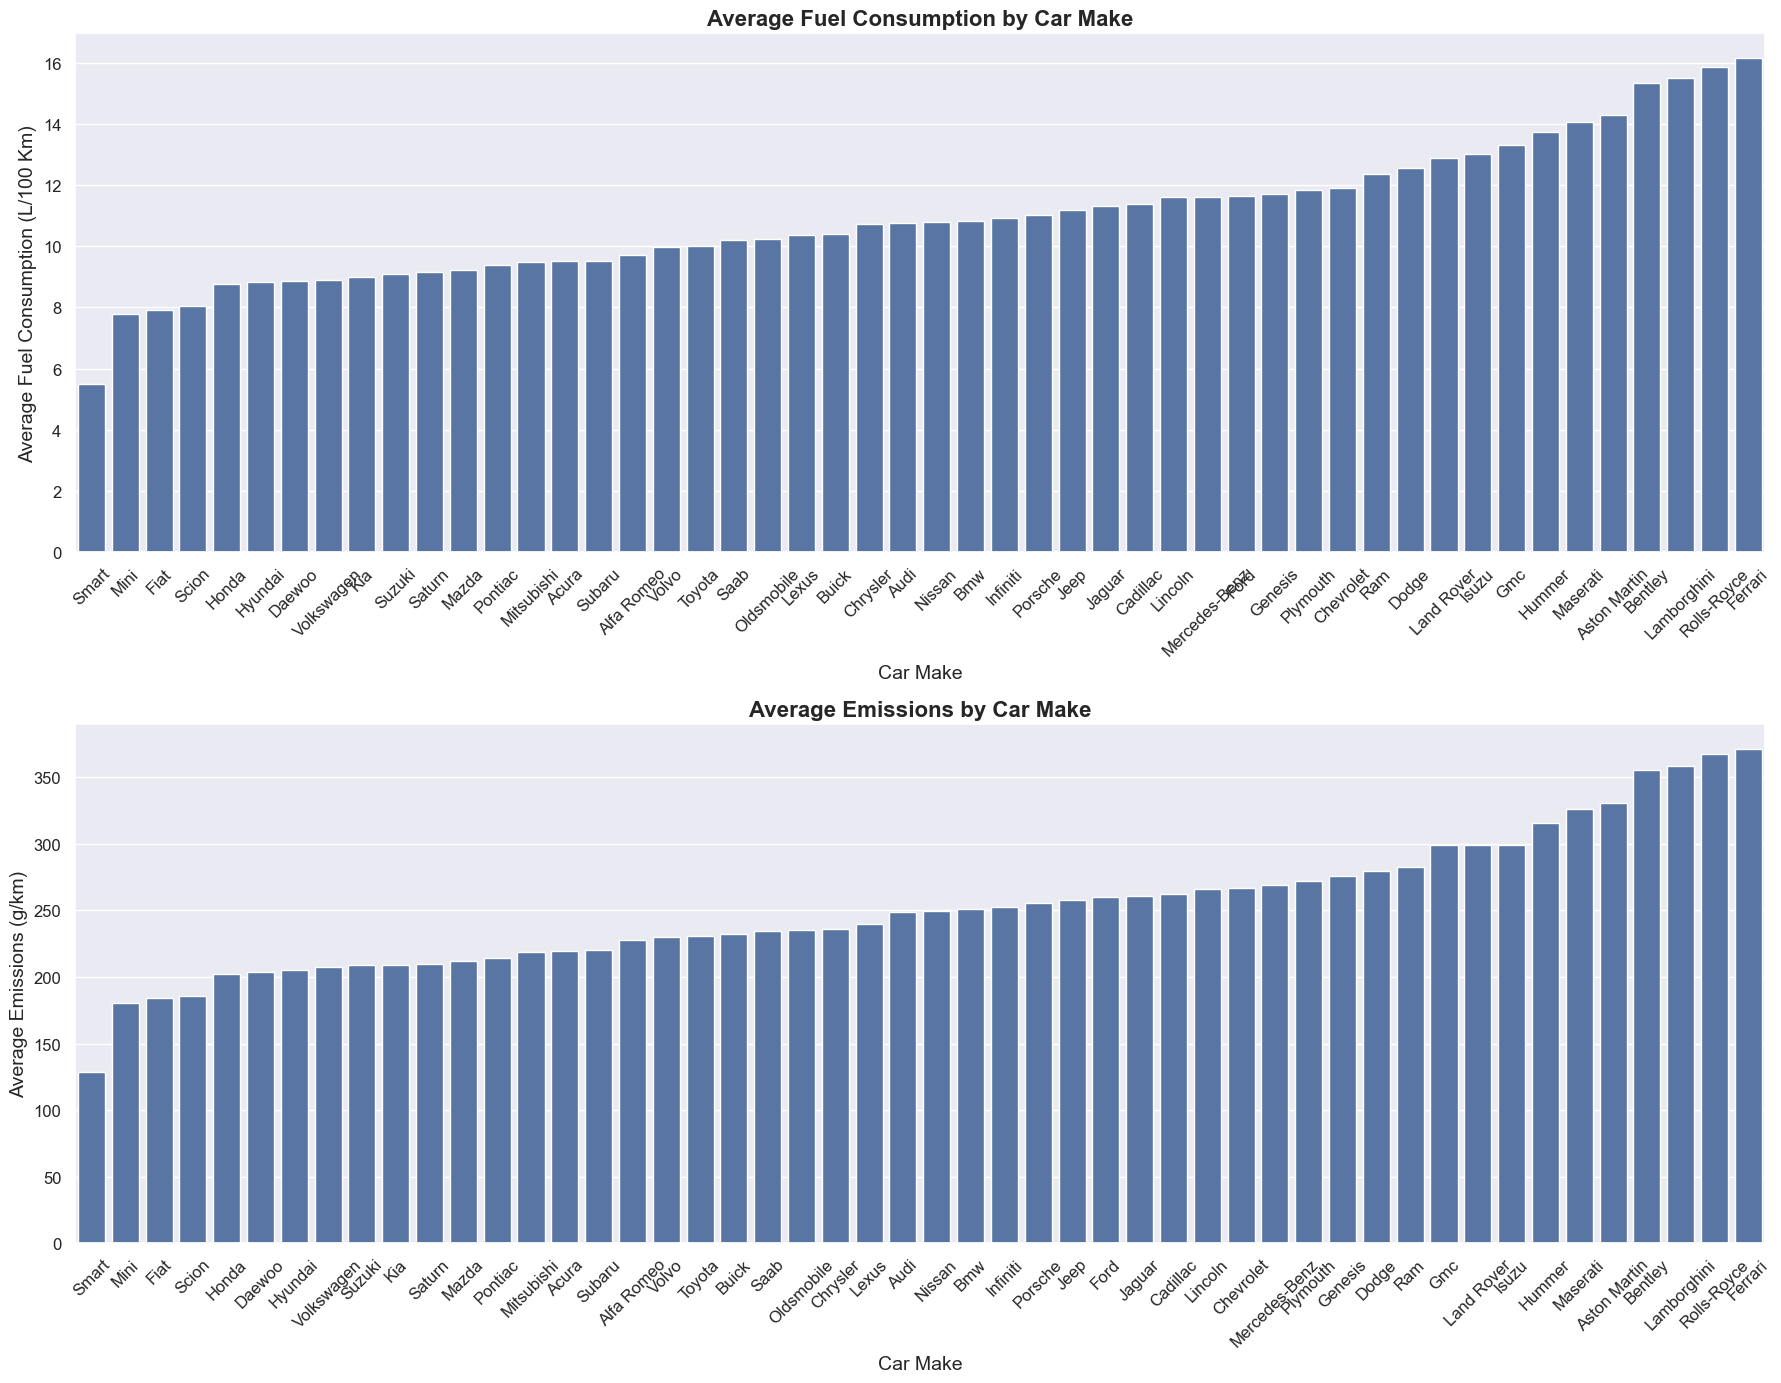

In [43]:

# sort the data
mean_fuel = df_clean.groupby('Make')['Comb_L_per_100Km'].mean().sort_values()
mean_emissions = df_clean.groupby('Make')['Emissions'].mean().sort_values()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))

# Plot for Average Fuel Consumption
sns.barplot(x=mean_fuel.index, y=mean_fuel.values,ax=axes[0])
axes[0].set_title('Average Fuel Consumption by Car Make', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Car Make', fontsize=14)
axes[0].set_ylabel('Average Fuel Consumption (L/100 Km)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot for Average Emissions
sns.barplot(x=mean_emissions.index, y=mean_emissions.values,ax=axes[1])
axes[1].set_title('Average Emissions by Car Make', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Car Make', fontsize=14)
axes[1].set_ylabel('Average Emissions (g/km)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


From the charts above, we can see that average fuel consumption has a direct relationship to emissions. Vehicles with the lowest fuel consumption also have the lowest emissions.

#### 3.2.3 Investigate how different Vehicle Classes perform in terms of fuel efficiency and CO2 emissions

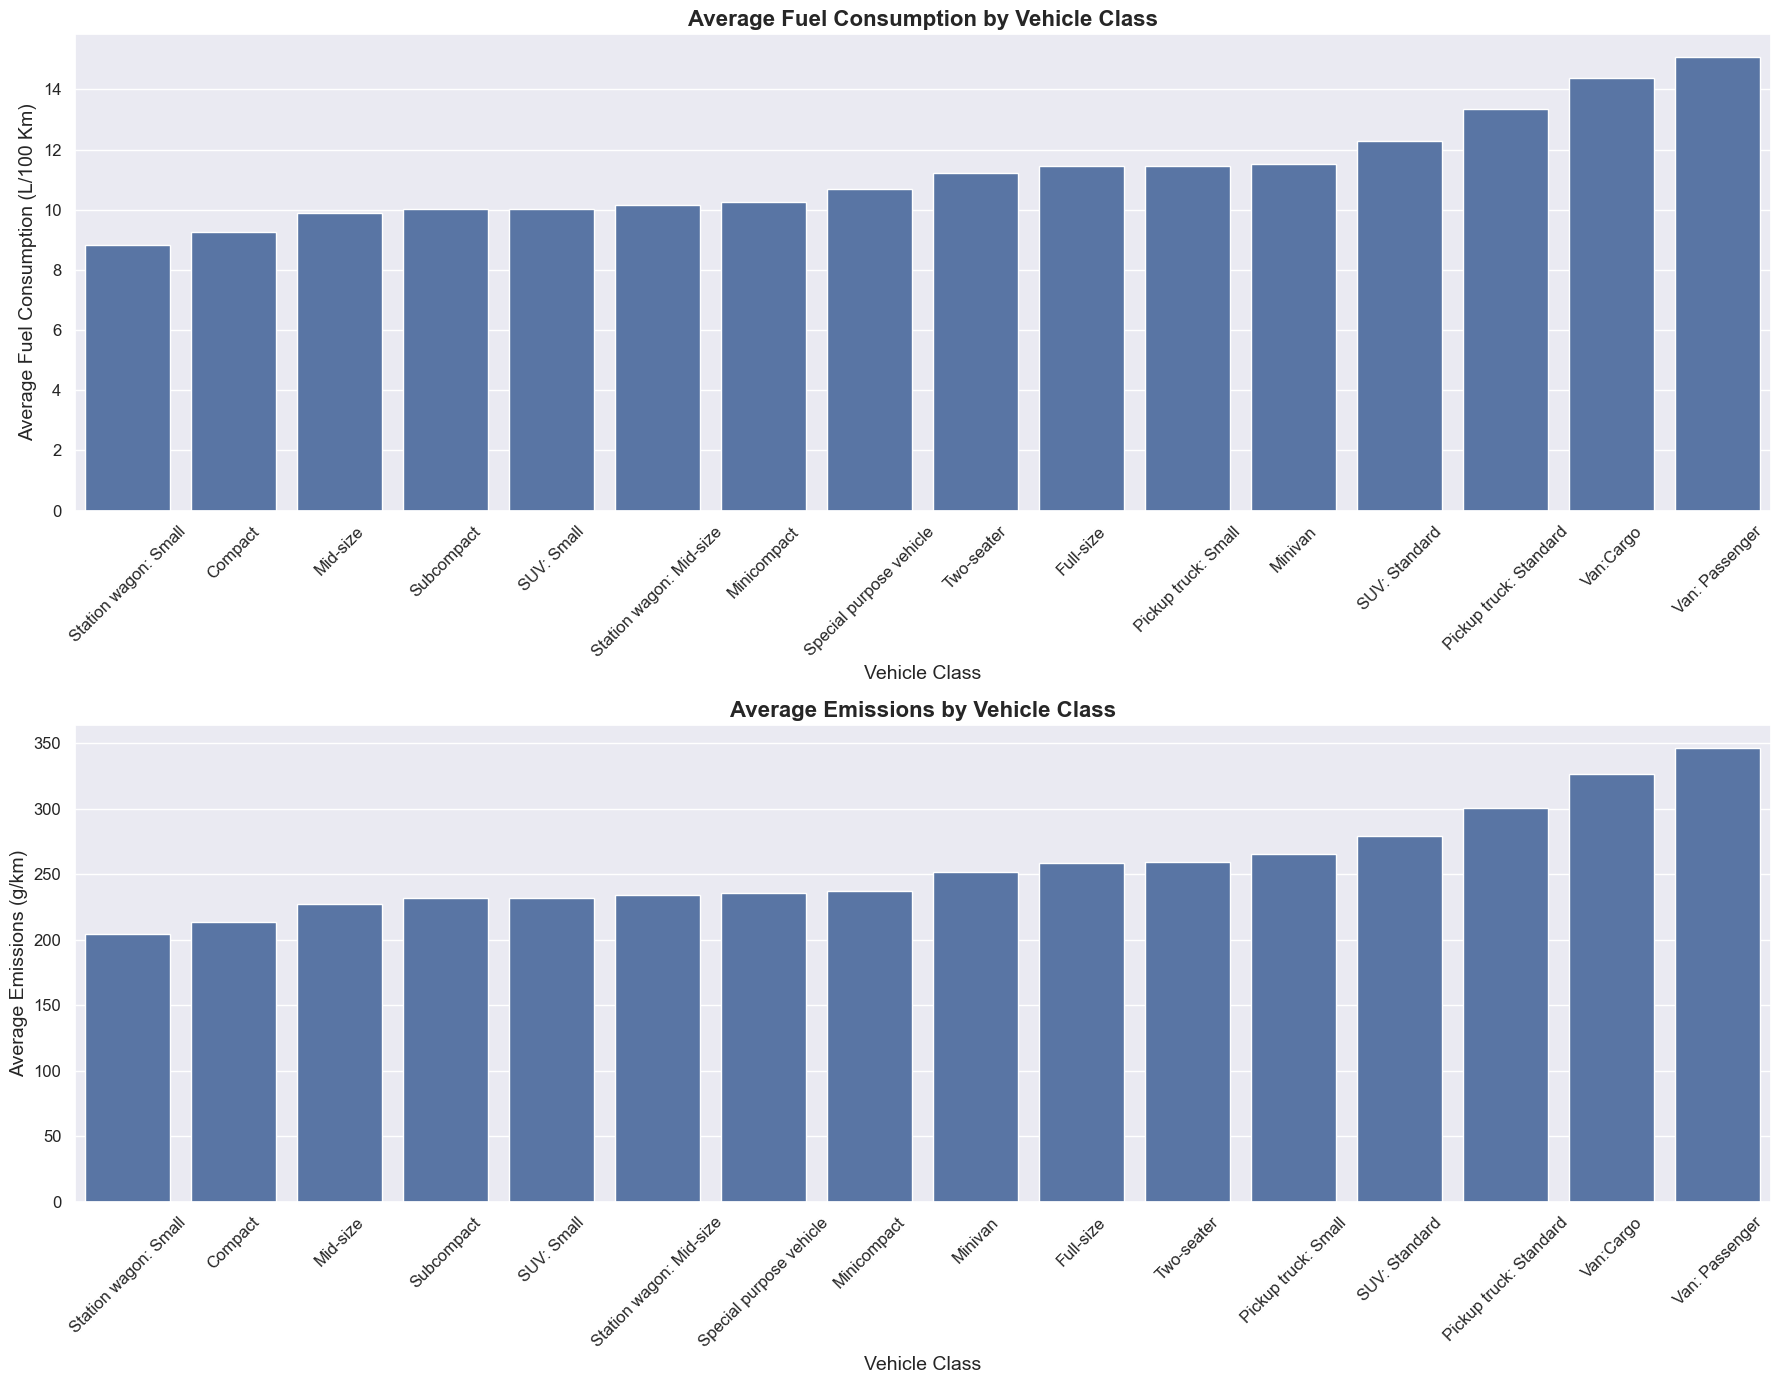

In [44]:
# sort the data
mean_fuel = df_clean.groupby('Vehicle Class')['Comb_L_per_100Km'].mean().sort_values()
mean_emissions = df_clean.groupby('Vehicle Class')['Emissions'].mean().sort_values()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))

# Plot for Average Fuel Consumption
sns.barplot(x=mean_fuel.index, y=mean_fuel.values,ax=axes[0])
axes[0].set_title('Average Fuel Consumption by Vehicle Class', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Vehicle Class', fontsize=14)
axes[0].set_ylabel('Average Fuel Consumption (L/100 Km)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot for Average Emissions
sns.barplot(x=mean_emissions.index, y=mean_emissions.values,ax=axes[1])
axes[1].set_title('Average Emissions by Vehicle Class', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Vehicle Class', fontsize=14)
axes[1].set_ylabel('Average Emissions (g/km)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The charts are almost a mirror image of one another, showing there is a very high correlationship between fuel consumption and emissions.

#### 3.2.4 Average Emissions by Fuel Type

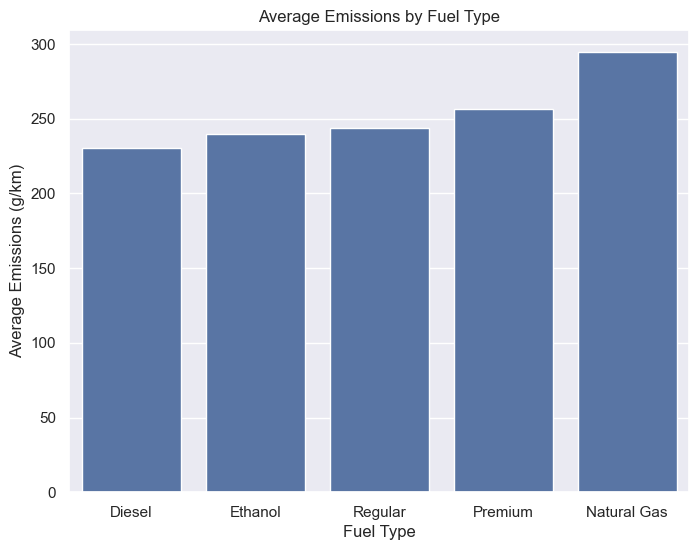

In [45]:

# Calculate the average emissions by fuel type
average_emissions = df_clean.groupby('Fuel')['Emissions'].mean().reset_index().sort_values(by='Emissions')

# Create a bar plot to visualize the average emissions by fuel type
plt.figure(figsize=(8, 6))
sns.barplot(x='Fuel', y='Emissions', data=average_emissions)
plt.title('Average Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Emissions (g/km)')
plt.show()


The chart shows that Diesel has the lowest average emissions with Natural Gas having the highest

#### 3.2.5 Average Consumption by Transmission Type

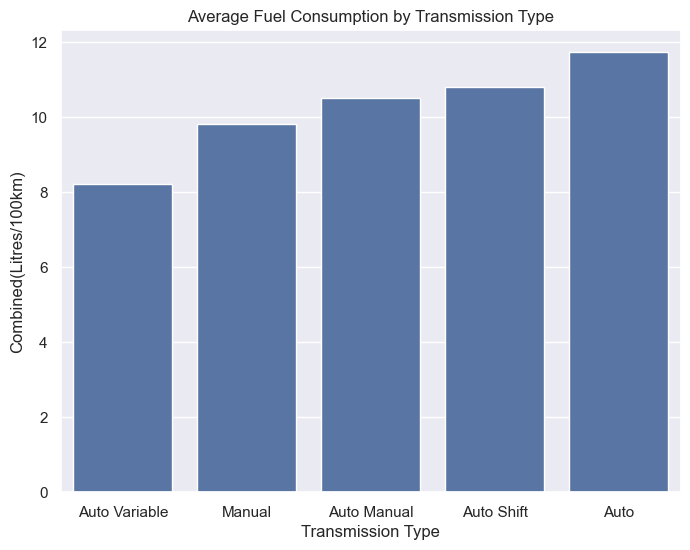

In [46]:
# Calculate the average fuel consumption by transmision type
average_fuel = df_clean.groupby('Transmission')['Comb_L_per_100Km'].mean().reset_index().sort_values(by='Comb_L_per_100Km')

# Create a bar plot to visualize the average emissions by fuel type
plt.figure(figsize=(8, 6))
sns.barplot(x='Transmission', y='Comb_L_per_100Km', data=average_fuel)
plt.title('Average Fuel Consumption by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Combined(Litres/100km)')
plt.show();

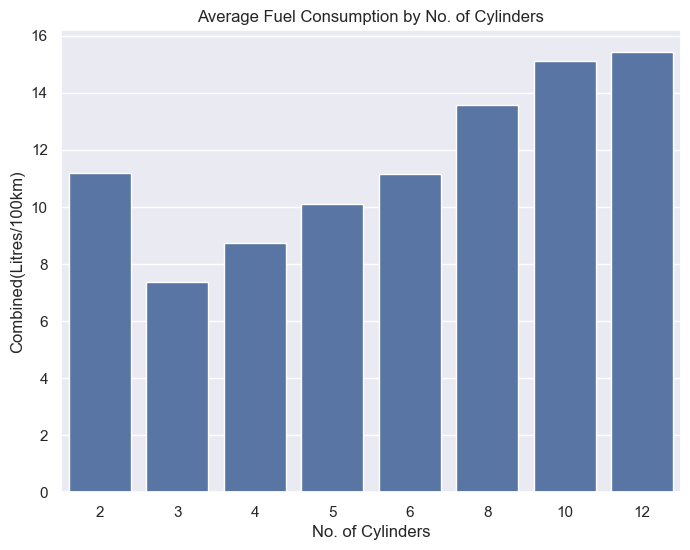

In [47]:
# Calculate the average fuel consumption by transmision type
average_fuel = df_clean.groupby('Cylinders')['Comb_L_per_100Km'].mean().reset_index().sort_values(by='Comb_L_per_100Km')

# Create a bar plot to visualize the average emissions by fuel type
plt.figure(figsize=(8, 6))
sns.barplot(x='Cylinders', y='Comb_L_per_100Km', data=average_fuel)
plt.title('Average Fuel Consumption by No. of Cylinders')
plt.xlabel('No. of Cylinders')
plt.ylabel('Combined(Litres/100km)')
plt.show();

#### 3.2.6 Trend Analysis on average fuel consumption and emission between 2000 and 2022


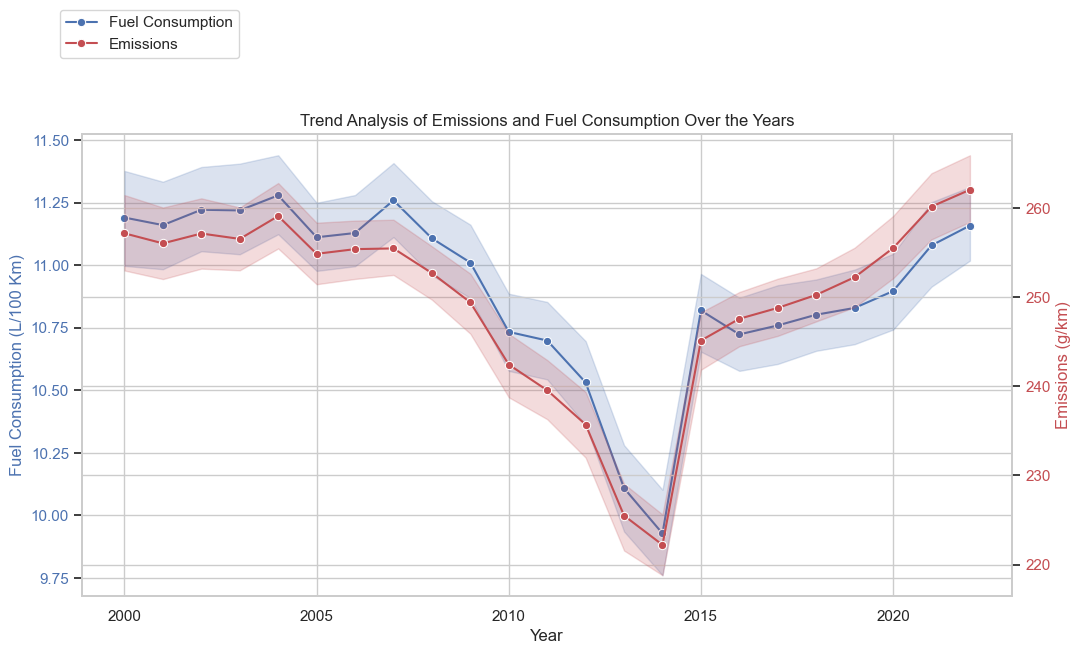

In [48]:


# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Fuel Consumption on the left y-axis
sns.lineplot(x='Year', y='Comb_L_per_100Km', data=df_clean, ax=ax1, marker='o', label='Fuel Consumption', color='b')
ax1.set_ylabel('Fuel Consumption (L/100 Km)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot Emissions
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Emissions', data=df_clean, ax=ax2, marker='o', label='Emissions', color='r')
ax2.set_ylabel('Emissions (g/km)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set plot title
plt.title('Trend Analysis of Emissions and Fuel Consumption Over the Years')

# Disable individual legends
ax1.get_legend().remove()
ax2.get_legend().remove()

# Place a combined legend outside the plot
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))

# Display the plot
plt.show()



**Fuel Consumption:** Represented by a blue line, shows a general decrease from 2000 to around 2013, then a sharp increase from 2013 to 2015, and a steady rise until 2020.

**Emissions:** Represented by a red line, follows a similar trend to fuel consumption with a decrease until around 2013, then a sharp increase from 2013 to 2015, and continued steady rise until 2020.


The decreasing trend in both fuel consumption and emissions until 2013 could be due to improvements in vehicle efficiency and stricter emission standards.

The increase from 2013 onwards might reflect changes in vehicle types, driving habits, or regulatory changes that impacted fuel consumption and emissions.    






## 4.0 Business Objectives

### 4.1 Identify 3 car makes for each vehicle class with the best fuel efficiency and lowest emissions.


In [49]:
# Group by Vehicle Class and Make, then calculate the average fuel consumption. We have seen that fuel consumption has a 
# very high correlation with emissions, so it is correct to assume that vehicles identified also have the the lowest emissions.
grouped = df_clean.groupby(['Vehicle Class', 'Make'])['Comb_L_per_100Km'].mean().reset_index()

# Sort and select the top 5 makes with the lowest fuel consumption for each vehicle class
top_makes = grouped.groupby('Vehicle Class').apply(lambda x: x.nsmallest(3, 'Comb_L_per_100Km')).reset_index(drop=True)

# Display the result

top_makes

C:\Users\Admin\AppData\Local\Temp\ipykernel_5816\4168837295.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_makes = grouped.groupby('Vehicle Class').apply(lambda x: x.nsmallest(3, 'Comb_L_per_100Km')).reset_index(drop=True)


,Vehicle Class,Make,Comb_L_per_100Km
0,Compact,Toyota,7.408000
1,Compact,Saturn,7.566667
2,Compact,Honda,7.594667
3,Full-size,Honda,7.967925
4,Full-size,Subaru,8.283333
5,Full-size,Hyundai,8.440404
6,Mid-size,Scion,7.550000
7,Mid-size,Hyundai,7.720213
8,Mid-size,Kia,7.966346
9,Minicompact,Fiat,7.430769


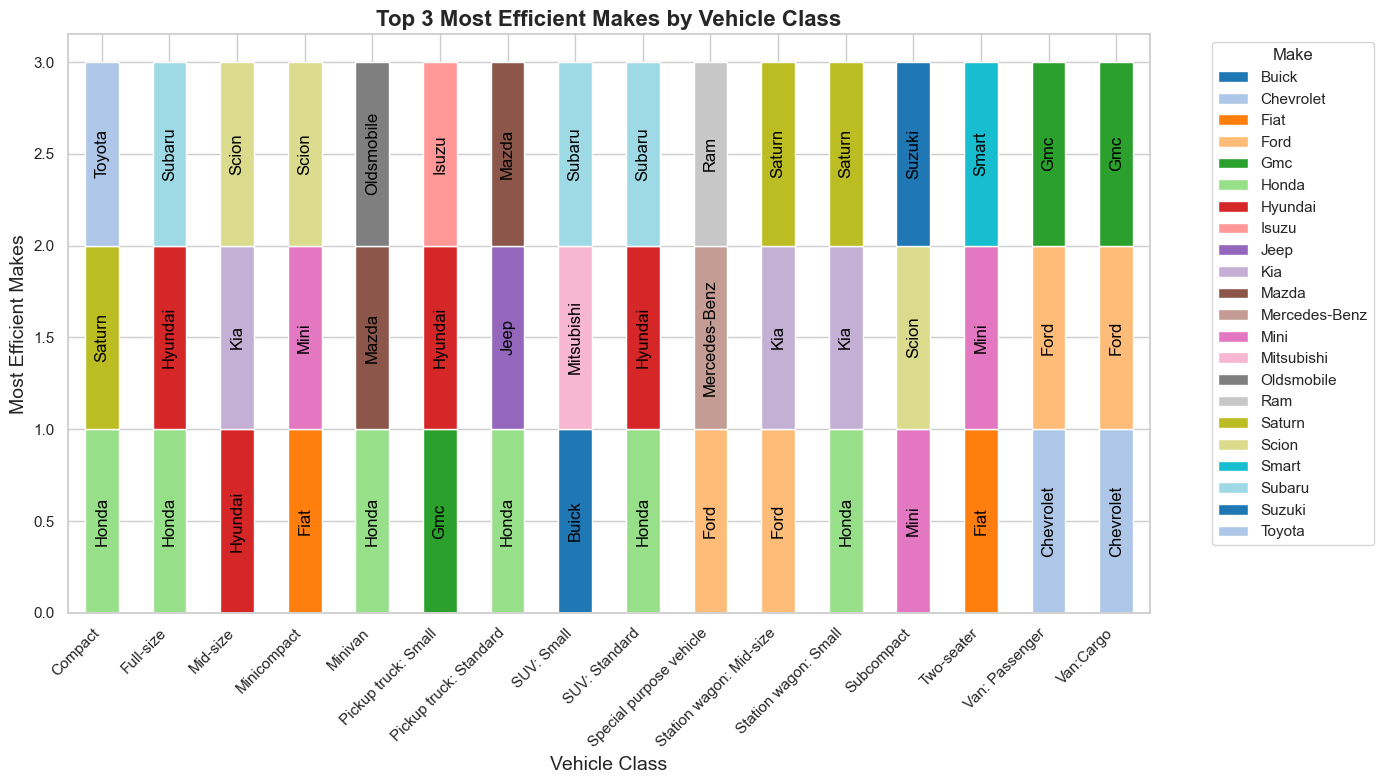

In [50]:

# Aggregate data by vehicle class and make
vehicle_make_counts = top_makes.groupby(['Vehicle Class', 'Make']).size().unstack().fillna(0)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stacked bar chart
bars = vehicle_make_counts.plot(kind='bar', stacked=True, ax=ax, color=plt.cm.tab20.colors)

# Add labels inside the bars
for vehicle_class in vehicle_make_counts.index:
    total_counts = 0
    for make in vehicle_make_counts.columns:
        if vehicle_make_counts.loc[vehicle_class, make] > 0:
            x_pos = list(vehicle_make_counts.index).index(vehicle_class)
            total_counts += vehicle_make_counts.loc[vehicle_class, make]
            ax.text(x_pos, total_counts - 0.5, make, ha='center', va='center', rotation=90, fontsize=12, color='black')

# Add title and labels
ax.set_title('Top 3 Most Efficient Makes by Vehicle Class', fontsize=16, weight='bold')
ax.set_xlabel('Vehicle Class', fontsize=14)
ax.set_ylabel('Most Efficient Makes', fontsize=14)
ax.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


### 4.2  Statistical tests to invstigate  statistical significance of variables that affect fuel efficiency and emissions

#### 4.2.1 Scatter plots to visualize linearity

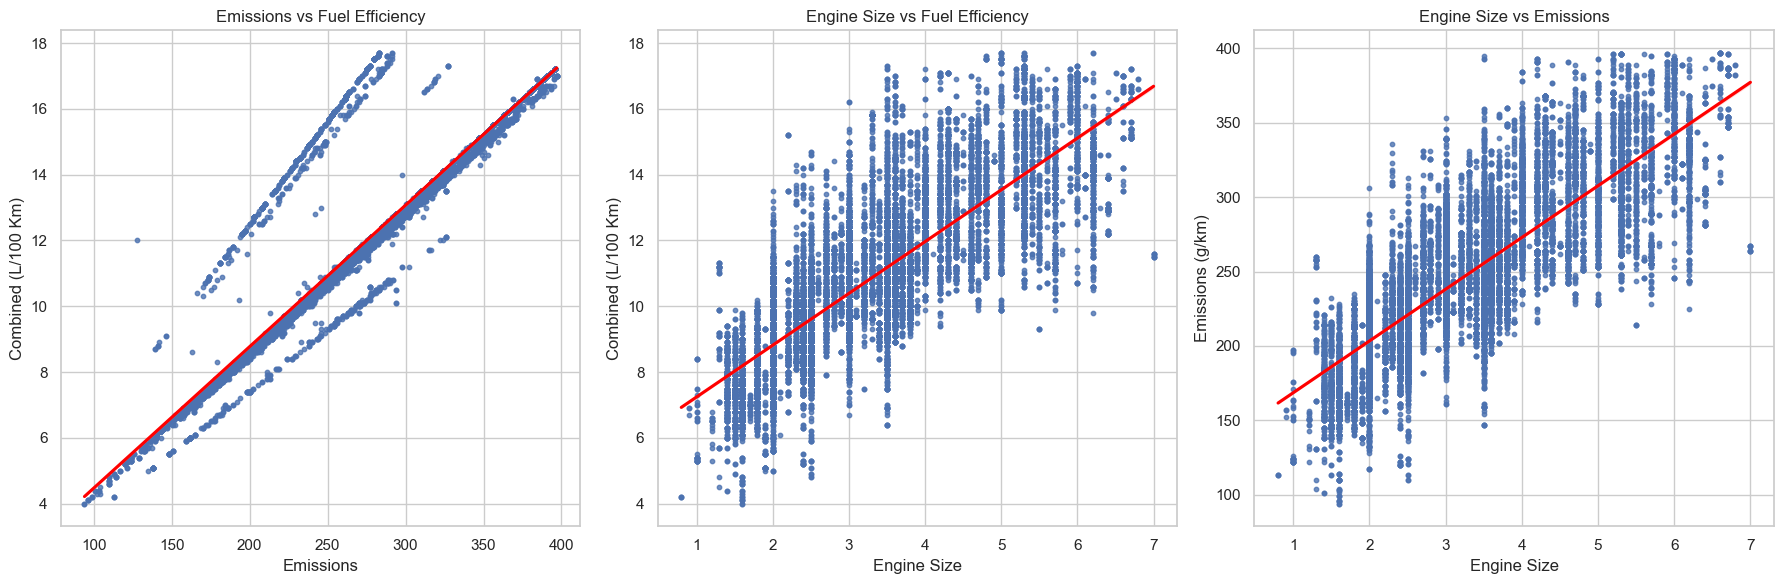

In [51]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Scatter plots to show the relationship between Fuel Consumption, Emissions, Engine Size

# Create subplots for each column against Fuel Efficiency
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

# Scatter plot for Emissions vs Fuel Efficiency with line of best fit
sns.regplot(x='Emissions', y='Comb_L_per_100Km', data=df_clean, ax=axes[0], scatter_kws={'s':10}, line_kws={'color':'red'})
axes[0].set_title('Emissions vs Fuel Efficiency')
axes[0].set_xlabel('Emissions')
axes[0].set_ylabel('Combined (L/100 Km)')

# Scatter plot for Engine Size vs Fuel Efficiency with line of best fit
sns.regplot(x='Engine Size', y='Comb_L_per_100Km', data=df_clean, ax=axes[1], scatter_kws={'s':10}, line_kws={'color':'red'})
axes[1].set_title('Engine Size vs Fuel Efficiency')
axes[1].set_xlabel('Engine Size')
axes[1].set_ylabel('Combined (L/100 Km)')

# Scatter plot for Engine Size vs Emissions with line of best fit
sns.regplot(x='Engine Size', y='Emissions', data=df_clean, ax=axes[2], scatter_kws={'s':10}, line_kws={'color':'red'})
axes[2].set_title('Engine Size vs Emissions')
axes[2].set_xlabel('Engine Size')
axes[2].set_ylabel('Emissions (g/km)')

# Adjust layout to prevent overlap 
plt.tight_layout()
plt.show()


#### 4.2.3 Regression Model: Effect of Engine Size on Fuel Consumption

#### Stating Hypothesis

Null Hypothesis (H₀): There is no significant relationship between fuel consumption and the engine size of a vehicle

Alternative Hypothesis (H₁): There is a significant relationship between fuel consumption and the engine size of a vehicle


In [52]:


import statsmodels.api as sm

x= df_clean['Engine Size']
y=df_clean['Comb_L_per_100Km']

# Add a constant to the independent variable 
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y,x).fit()

# Print the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Comb_L_per_100Km   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 4.137e+04
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:15:57   Log-Likelihood:                -37196.
No. Observations:               20974   AIC:                         7.440e+04
Df Residuals:                   20972   BIC:                         7.441e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.6682      0.027    206.381      0.000       5.614       5.722
Engine Size     1.5738      0.008    203.404      0.000       1.559       1.589
==============================================================================
Omnibus:                      818.424   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1287.161
Skew:                           0.359   Prob(JB):                    3.14e-280
Kurtosis:                       3.979   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Key Metrics**:

1. **R-Squared:** 0.664  
This means that approximately 66.4% of the variablility in fuel consumption can b explained by the engine size. This is a   moderately strong relationship.  
2. **F-Statistic:** 4.137e+04 with a p-value of 0.00
The F-statistic is very high, and the corresponding p-value is < 0.0, indicating that the model is statistically significant.  
3. **Coefficients: Intercept(const):** 5.6682  
This is the expected value of 'Comb (L/100 Km)' when 'Engine Size' is zero  
4. **Coefficients: Engine Size:** 1.5738   
For each one-unit increase in Engine Size, the Comb (L/100 Km) increases by approximately 1.5738 units, holding all else constant.  
5.**P>|t|:** Both the intercept and the engine size coefficients have p-values of 0.000, indicating they are statistically significant (typically, a p-value < 0.05 is considered significant). 

**We Reject the Null Hypothesis**

**Summary:**
The model shows a strong positive relationship between engine size and fuel consumption. The results indicate that as engine size increases, fuel consumption also increases, which aligns with typical expectations. The model explains a significant portion of the variability in fuel consumption, and the statistical tests suggest the model is reliable.


#### 4.2.4 Regression Model: Effect of No. of cylinders on Fuel Consumption

#### Stating Hypothesis

Null Hypothesis (H₀): There is no significant relationship between fuel consumption and number of cylinders in a vehicle.

Alternative Hypothesis (H₁): There is a significant relationship between fuel consumption and number of cylinders in a vehicle.


In [53]:

    
import statsmodels.api as sm

x= df_clean['Cylinders']
y=df_clean['Comb_L_per_100Km']

# Add a constant to the independent variable 
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y,x).fit()

# Print the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Comb_L_per_100Km   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 3.150e+04
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:15:57   Log-Likelihood:                -39005.
No. Observations:               20974   AIC:                         7.801e+04
Df Residuals:                   20972   BIC:                         7.803e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5214      0.037    120.826      0.000       4.448       4.595
Cylinders      1.0956      0.006    177.471      0.000       1.083       1.108
==============================================================================
Omnibus:                      845.562   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1018.204
Skew:                           0.459   Prob(JB):                    7.94e-222
Kurtosis:                       3.567   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Key Metrics**:

1. **R-Squared:** 0.60  
This means that approximately 60% of the variablility in fuel consumption can b explained by the number of cylinders a vehicle has. This is a   moderately strong relationship.  
2. **F-Statistic:** 3.150e+04 with a p-value of 0.00
The F-statistic is  high, and the corresponding p-value is < 0.05, indicating that the model is statistically significant.  
3. **Coefficients: Intercept(const):** 4.5214  
This is the expected value of 'Comb (L/100 Km)' when 'Cylinders' is zero  
4. **Coefficients: Engine Size:** 1.0956   
For each one-unit increase in cylinders, the Comb (L/100 Km) increases by approximately 1.0956 units, holding all else constant.  
5.**P>|t|:** Both the intercept and the engine size coefficients have p-values of 0.000, indicating they are statistically significant (typically, a p-value < 0.05 is considered significant). 

**We Reject the Null Hypothesis**

**Summary:**
The model shows a strong positive relationship between enumber of cylinders and fuel consumption. The results indicate that as number of cylinders increases, fuel consumption also increases, which also aligns with typical expectations. The model explains a significant portion of the variability in fuel consumption, and the statistical tests suggest the model is reliable.


#### 4.2.5  Regression Model: Effect of fuel consumption  on Emissions

#### Stating Hypothesis

Null Hypothesis (H₀): There is no significant relationship between fuel consumption and emissions

Alternative Hypothesis (H₁): There is a significant relationship between fuel consumption and emissions


In [54]:

import statsmodels.api as sm

x= df_clean['Comb_L_per_100Km']
y=df_clean['Emissions']

# Add a constant to the independent variable 
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y,x).fit()

# Print the regression results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 1.692e+05
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:15:58   Log-Likelihood:                -90283.
No. Observations:               20974   AIC:                         1.806e+05
Df Residuals:                   20972   BIC:                         1.806e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               23.7662      0.562     42.320      0.000      22.665      24.867
Comb_L_per_100Km    20.7008      0.050    411.287      0.000      20.602      20.799
==============================================================================
Omnibus:                    17588.538   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           400131.724
Skew:                          -4.094   Prob(JB):                         0.00
Kurtosis:                      22.769   Cond. No.                         51.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Key Metrics**:

1. **R-Squared:** 0.890  
This means that approximately 89% of the variablility in emissions can be explained by the vehicle consumption(Litres/100 km) This is a very strong relationship.  
2. **F-Statistic:** 1.692e+05 with a p-value of 0.00
The F-statistic is very high, and the corresponding p-value is < 0.05, indicating that the model is statistically significant.  
3. **Coefficients: Intercept(const):** 23.7662  
This is the expected value of emissions when the combined fuel consumption is zero
4. **Coefficients: Engine Size:** 20.7008   
For each one-unit increase in combined fuel consumption, emissions increase by approximately 20.7008 units, holding all else constant.
5.**P>|t|:** Both the intercept and the engine size coefficients have p-values of 0.000, indicating they are statistically significant (typically, a p-value < 0.05 is considered significant). 

**We Reject the Null Hypothesis**

**Summary:**
our model shows a very strong positive relationship between combined fuel consumption and emissions. This suggests that as fuel consumption increases, emissions also significantly increase. The high R-squared value and significant F-statistic affirm the model's reliability in explaining the variability in emissions.These results provide important insights into the environmental impact of fuel consumption.


#### 4.2.5 Anova Tests: The effect of the type of fuel on emissions

#### Stating Hypothesis

Null Hypothesis (H₀): There is no significant relationship between emissions and type of fuel that a vehicle uses.

Alternative Hypothesis (H₁): There is a significant relationship between emissions and type of fuel that a vehicle uses.


In [55]:
import scipy.stats as stats

# Extract fuel consumption values for each fuel type
fuel_X = df_clean[df_clean['Fuel'] == 'Regular']['Emissions']
fuel_Z = df_clean[df_clean['Fuel'] == 'Premium']['Emissions']
fuel_E = df_clean[df_clean['Fuel'] == 'Ethanol']['Emissions']
fuel_N = df_clean[df_clean['Fuel'] == 'Natural Gas']['Emissions']
fuel_D = df_clean[df_clean['Fuel'] == 'Diesel']['Emissions']


# Perform ANOVA test
anova_result = stats.f_oneway(fuel_X, fuel_Z, fuel_E, fuel_N, fuel_D)
    
print("ANOVA result for Fuel Consumption by Fuel Type:")
print(anova_result)


ANOVA result for Fuel Consumption by Fuel Type:
F_onewayResult(statistic=np.float64(85.59789985275138), pvalue=np.float64(3.0207617995906457e-72))


**Interpretation of ANOVA Results:**  
1. **F-statistic: 85.64** 
This high value indicates that the variability between group means (emissions for different fuel types) is much greater than the variability within the groups.  
2. **p-value: 2.801731643255809e-72**  
The p-value is extremely low (much less than 0.05), which means we can reject the null hypothesis. There is a statistically   significant difference in emissions between at least two of the fuel types.

#### Reject the Null Hypothesis

ANOVA result for Emissions by Fuel Type:
                sum_sq       df        F        PR(>F)
C(Fuel)   9.803975e+05      4.0  85.5979  3.020762e-72
Residual  6.004223e+07  20969.0      NaN           NaN
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
     Diesel     Ethanol   9.4314 0.0785  -0.6291  19.4918  False
     Diesel Natural Gas  64.1488    0.0  31.9545  96.3431   True
     Diesel     Premium  26.1413    0.0  17.7606   34.522   True
     Diesel     Regular  13.7234 0.0001   5.3688   22.078   True
    Ethanol Natural Gas  54.7175    0.0  23.0637  86.3712   True
    Ethanol     Premium  16.7099    0.0  10.7334  22.6865   True
    Ethanol     Regular   4.2921 0.2802  -1.6479   10.232  False
Natural Gas     Premium -38.0075 0.0078 -69.1681  -6.8469   True
Natural Gas     Regular -50.4254 0.0001  -81.579 -19.2718   True
    Premium   

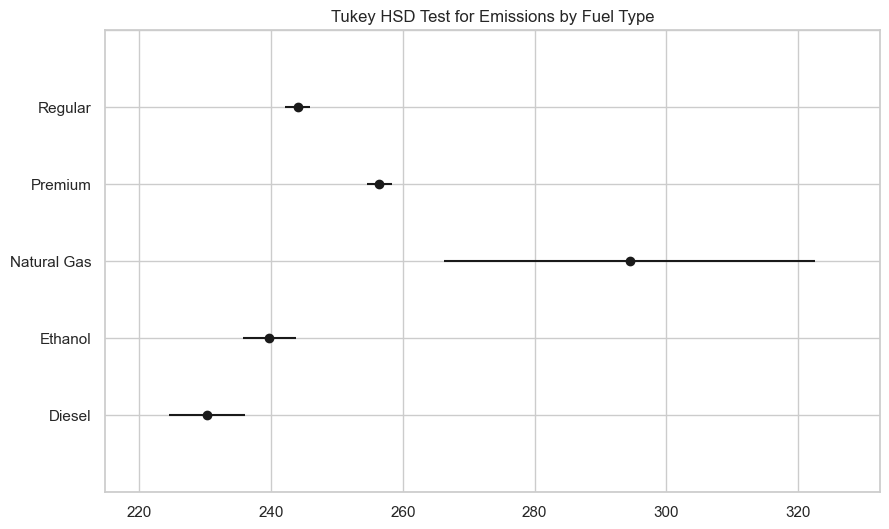

In [56]:
# Perform paired tests

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA test
anova_result = sm.stats.anova_lm(sm.OLS.from_formula('Emissions ~ C(Fuel)', data=df_clean).fit(), typ=2)
print("ANOVA result for Emissions by Fuel Type:")
print(anova_result)

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df_clean['Emissions'],
                                 groups=df_clean['Fuel'],
                                 alpha=0.05)
print(tukey_result)

# Plotting the results
tukey_result.plot_simultaneous()
plt.title('Tukey HSD Test for Emissions by Fuel Type')
plt.show()



**Summary**  
The **reject** column being **True** for most columns indicate that most fuel types have significant differences in their mean emissions, except for the pairs Diesel vs Ethanol and Ethanol and Regular which shows no significant difference. These findings are crucial for understanding how different fuel types impact emissions and can inform decisions for reducing environmental impact.

**Plot Interpretation**
The plot shows which fuel types have higher or lower mean emissions. It is clear that Diesel has the lowest while natural gas has the highest.    
The horizontal lines provide the range within which the true mean emissions are expected to fall. If the confidence intervals of two fuel types do not overlap, it suggests a statistically significant difference between them.  


#### 4.2.6 Anova Tests: The effect of the type of transmission on fuel consumption

#### Stating Hypothesis

Null Hypothesis (H₀): There is no significant relationship between fuel consumption and transmission type of a vehicle

Alternative Hypothesis (H₁): There is a significant relationship between fuel consumption and transmission type of a vehicle

In [57]:
import scipy.stats as stats

# Extract fuel consumption values for each fuel type
A= df_clean[df_clean['Transmission'] == 'Auto']['Comb_L_per_100Km']
AS = df_clean[df_clean['Transmission'] == 'Auto Shift']['Comb_L_per_100Km']
M = df_clean[df_clean['Transmission'] == 'Manual']['Comb_L_per_100Km']
AM = df_clean[df_clean['Transmission'] == 'Auto Manual']['Comb_L_per_100Km']
AV = df_clean[df_clean['Transmission'] == 'Auto Variable']['Comb_L_per_100Km']


# Perform ANOVA test
anova_result = stats.f_oneway(A, AS, M, AM, AV)
    
print("ANOVA result for Fuel Consumption by Transmission Type:")
print(anova_result)

ANOVA result for Fuel Consumption by Transmission Type:
F_onewayResult(statistic=np.float64(654.2838650873059), pvalue=np.float64(0.0))


**Interpretation of ANOVA Results:**

**F-statistic:**  
643.91 This high value indicates a substantial difference in fuel consumption across the different transmission types.  
**p-value: 0.0**    
The p-value is less than 0.05, which means we reject the null hypothesis and conclude that there is a statistically significant difference in fuel consumption between at least two of the transmission types.

#### Reject the Null Hypothesis


ANOVA result for Fuel Consumption by Transmission Type:
                        sum_sq       df           F  PR(>F)
C(Transmission)   14058.078264      4.0  654.283865     0.0
Residual         112636.066261  20969.0         NaN     NaN
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
         Auto   Auto Manual  -1.2245    0.0  -1.433 -1.0161   True
         Auto    Auto Shift  -0.9152    0.0 -1.0197 -0.8106   True
         Auto Auto Variable  -3.5008    0.0 -3.8313 -3.1702   True
         Auto        Manual  -1.9035    0.0 -2.0187 -1.7883   True
  Auto Manual    Auto Shift   0.3094 0.0006  0.0982  0.5205   True
  Auto Manual Auto Variable  -2.2763    0.0 -2.6543 -1.8982   True
  Auto Manual        Manual   -0.679    0.0 -0.8956 -0.4624   True
   Auto Shift Auto Variable  -2.5856    0.0 -2.9179 -2.2533   True
   Auto Shift        Manual

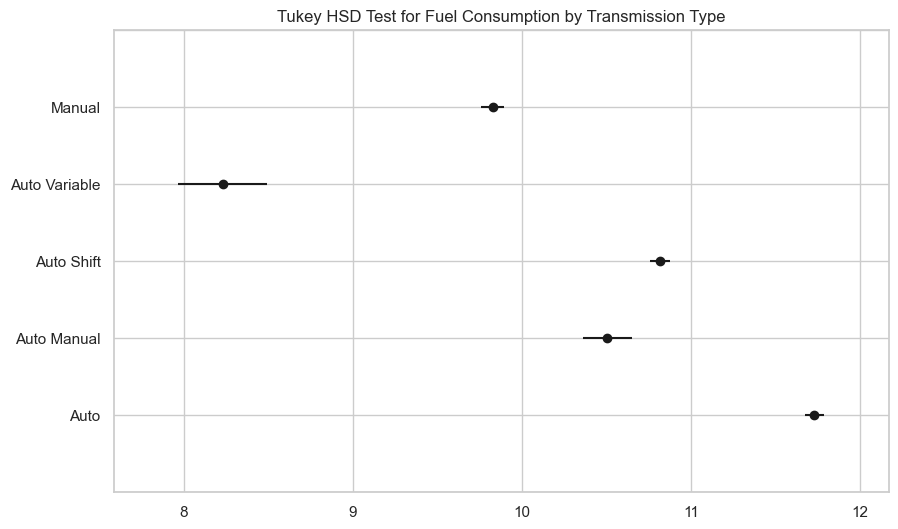

In [58]:
# Perform Paired Tests

# Perform ANOVA test
anova_result = sm.stats.anova_lm(sm.OLS.from_formula('Comb_L_per_100Km ~ C(Transmission)', data=df_clean).fit(), typ=2)
print("ANOVA result for Fuel Consumption by Transmission Type:")
print(anova_result)

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df_clean['Comb_L_per_100Km'],
                                 groups=df_clean['Transmission'],
                                 alpha=0.05)
print(tukey_result)

# Plotting the results
tukey_result.plot_simultaneous()
plt.title('Tukey HSD Test for Fuel Consumption by Transmission Type')
plt.show()


The **reject** column being **True** for all comparisons indicates that there are statistically significant differences in fuel consumption between each pair of transmission types and that the type of transmission affects fuel consumption.
**Reject the Null Hypothesis**

### 5.0 Summary and Recommendations

#### We have provided a fleet matrix for each vehicle classe showing 3 car brands  that have the lowest average fuel consumption and emissions. In choosing the model of the vehicle to buy, we advise our client to consider the following vehicle characteristics that impact both fuel efficiency and CO2 emissions:-
- Engine Size: Vehicles with higher engine sizes affect both fuel economy and CO2 emissions. The smaller the engine the better the efficiency.  
- Transmission Type: Where available, go for Auto Variable, Manual or Auto Manual transmission types as they have better fuel efficiency on average. The number of gears do not matter as these have no impact on both emissions and fuel consumption.
- Fuel Type: Diesel, Ethanol and Regular gasoline fuel types, in that order, have the lowest average emissions. Where available, we recomend they buy models that uses either of these 3 types of fuel. Natural gas has the highest average emissions and we strongly advise to avoid models that use this type of fuel.
- Number of Cylinders: Cars with cylinders of between 3 and 5 give the best fuel economy. This correlates with a smaller engine size.